Importing [textblob](https://pypi.python.org/pypi/textblob) will be a problem that has to be overcome.  We'll need to go to the commandline and either use `conda install textblob` _or_ `pip install textblob`.  But they might not have pip, in which case we'd need to install that.  Might seem like a pain but sooner or later they'll want a library that isn't included in Anaconda and they'll need to get it.  This side-step will further underscore the importance of the command line.

*How are these installed on Windows?*

Can feature the re-use of the preprocessor from the first chart.

Also loading of imports at top (vs. in-line)

There is converting of types here (Dictionary to string to blob) that will need to be checked and tested.

Could turn this into a visualization showing the change is sentiment analysis over time.

In [10]:
# with open('tweets-0001.json') as inFile:
    
from textblob import TextBlob

text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

blob = TextBlob(text)
# print(blob.tags)           # [('The', 'DT'), ('titular', 'JJ'),
                    #  ('threat', 'NN'), ('of', 'IN'), ...]

# print(blob.noun_phrases)   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',
                    #            'amoeba-like mass', ...])

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)
    print(sentence.sentiment.index)
# 0.060
# -0.341

0.06000000000000001
<built-in method index of Sentiment object at 0x10c777f78>
-0.34166666666666673
<built-in method index of Sentiment object at 0x10f170480>


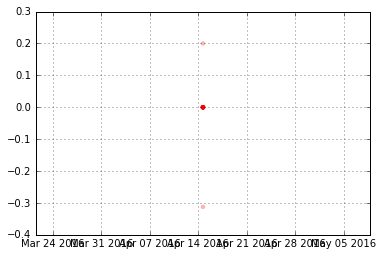

In [49]:
from datetime import datetime
from textblob import TextBlob
import json
import re
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import rand
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'RT', '…']

#Instantiate a text pre-processor
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

fname = 'tweets-0001.json'
each_tweet=[]
with open(fname, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        # print(tweet['text'])
        each_tweet.append([tweet['created_at'],tweet['text']])
        # print(each_tweet)
    points=[]
    for tweet_deets in each_tweet:
        #print(tweet_text)
        blob = TextBlob(tweet_deets[1])
        #print(blob)
        #print(tweet_deets[0][:50], " : ", blob.sentiment.polarity)
        #Time directives taken from https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior
        #Date conversion from http://stackoverflow.com/questions/2265357/parse-date-string-and-change-format
        tweet_date = datetime.strptime(tweet_deets[0], '%a %b %d %H:%M:%S %z %Y')
        points.append([tweet_date,blob.sentiment.polarity])
    
    plt.scatter([item[0] for item in points] , [item[1] for item in points], c='red', alpha=0.3, edgecolors='none')

# Drawing on http://matplotlib.org/examples/lines_bars_and_markers/scatter_with_legend.html 
# Also drawing on http://matplotlib.org/examples/pylab_examples/date_demo_rrule.html
"""
for color in ['red', 'green', 'blue']:
    n = 750
    x, y = rand(2, n)
    scale = 200.0 * rand(n)
    plt.scatter(x, blob.sentiment.polarity, c='blue',
                alpha=0.3, edgecolors='none')
"""
#plt.legend()
plt.grid(True)

plt.show()

In [ ]:
#!/usr/bin/env python
"""
Show how to use an rrule instance to make a custom date ticker - here
we put a tick mark on every 5th easter

See https://moin.conectiva.com.br/DateUtil for help with rrules
"""
import matplotlib.pyplot as plt
from matplotlib.dates import YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange
import numpy as np
import datetime

# tick every 5th easter
rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
date1 = datetime.date(1952, 1, 1)
date2 = datetime.date(2004, 4, 12)
delta = datetime.timedelta(days=100)

dates = drange(date1, date2, delta)
s = np.random.rand(len(dates))  # make up some random y values


fig, ax = plt.subplots()
plt.plot_date(dates, s)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

plt.show()